# Ejemplos de Algoritmos de Machine Learning No Supervisado

Este notebook contiene ejemplos breves y didácticos de entrenamiento y evaluación para varios algoritmos no supervisados de `scikit-learn`. Los datos utilizados provienen del archivo `penguins_subset.csv`.


## 1. Importar Librerías y Cargar Datos

In [ ]:
# ! pip install umap-learn mlxtend

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules
import umap

# Cargar datos
df = pd.read_csv("../data/penguins/penguins.csv")



In [20]:
df.dropna(inplace=True)
df.isna().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Comments               0
dtype: int64

In [ ]:
# Seleccionar características numéricas y eliminar valores nulos
X = df[['Flipper Length (mm)', 'Body Mass (g)']].dropna()

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 2. K-Means

- Agrupa datos en k clústeres basados en la distancia euclidiana.

Inercia: 16.15787398146643
Silhouette Score: 0.4021514342728681


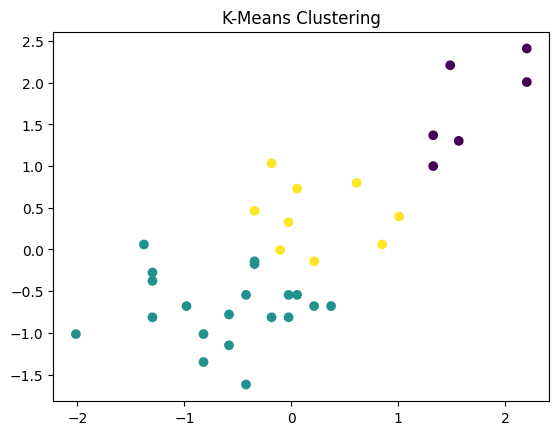

In [22]:
# Entrenar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Evaluación: Inercia y Silhouette Score
print(f"Inercia: {kmeans.inertia_}")
print(f"Silhouette Score: {silhouette_score(X_scaled, df['Cluster_KMeans'])}")

# Visualización
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster_KMeans'], cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

## 3. DBSCAN
- Clustering basado en densidad que identifica regiones densas de puntos.

Cluster_DBSCAN
 0    22
-1    13
Name: count, dtype: int64


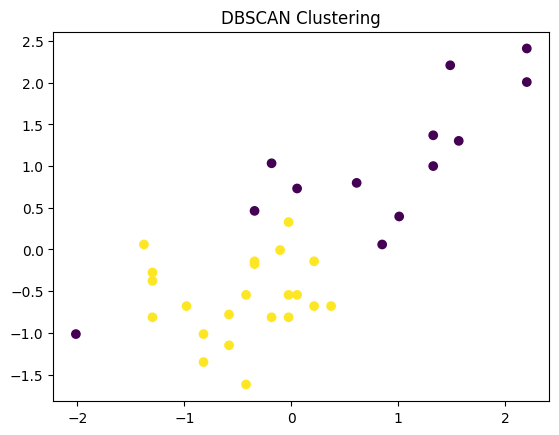

In [23]:
# Entrenar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Evaluación: Contar puntos en cada clúster
print(df['Cluster_DBSCAN'].value_counts())

# Visualización
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster_DBSCAN'], cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()

## 4. Hierarchical Clustering
- Agrupa datos en una jerarquía de clústeres mediante un enfoque aglomerativo.

Silhouette Score: 0.43399770261265636


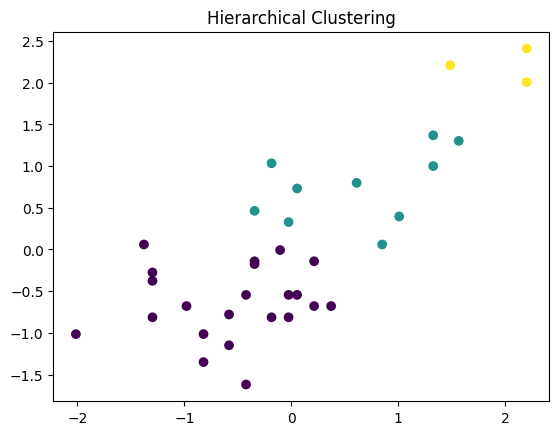

In [24]:
# Entrenar clustering jerárquico
agg_clustering = AgglomerativeClustering(n_clusters=3)
df['Cluster_Agg'] = agg_clustering.fit_predict(X_scaled)

# Evaluación: Silhouette Score
print(f"Silhouette Score: {silhouette_score(X_scaled, df['Cluster_Agg'])}")

# Visualización
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster_Agg'], cmap='viridis')
plt.title("Hierarchical Clustering")
plt.show()

## 5. Gaussian Mixture Model (GMM)
- Modelo probabilístico que asume que los datos son generados por una mezcla de distribuciones gaussianas.

Log-verosimilitud: -2.1239897220260935


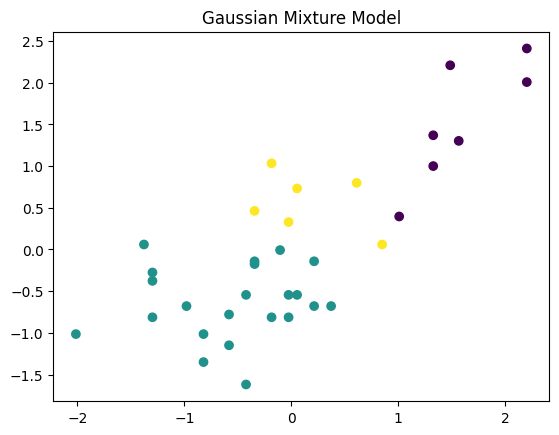

In [25]:
# Entrenar GMM
gmm = GaussianMixture(n_components=3, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(X_scaled)

# Evaluación: Log-verosimilitud
print(f"Log-verosimilitud: {gmm.score(X_scaled)}")

# Visualización
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster_GMM'], cmap='viridis')
plt.title("Gaussian Mixture Model")
plt.show()

## 6. Apriori (Association)
- Algoritmo de asociación que identifica conjuntos de elementos frecuentes en transacciones.

In [26]:
# Crear datos de ejemplo (compras de productos)
data = {'Producto': ['Manzana', 'Banana', 'Leche', 'Pan', 'Manzana', 'Banana', 'Leche'],
        'Transacción': [1, 1, 1, 2, 2, 3, 3]}
basket = pd.DataFrame(data).pivot_table(index='Transacción', columns='Producto', aggfunc=len, fill_value=0)

# Entrenar Apriori
frequent_itemsets = apriori(basket, min_support=0.5, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Mostrar reglas de asociación
print(rules[['antecedents', 'consequents', 'support', 'confidence']])

  antecedents consequents   support  confidence
0    (Banana)     (Leche)  0.666667         1.0
1     (Leche)    (Banana)  0.666667         1.0


d:\Program Files\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## 7. Principal Component Analysis (PCA)
- Técnica de reducción de dimensionalidad que transforma los datos en componentes principales ortogonales.

Varianza explicada: [0.88792509 0.11207491]


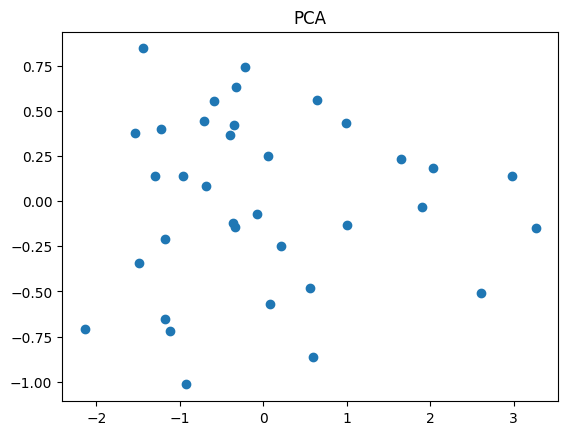

In [27]:
# Entrenar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Evaluación: Varianza explicada
print(f"Varianza explicada: {pca.explained_variance_ratio_}")

# Visualización
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA")
plt.show()

## 8. t-SNE
- Técnica de reducción de dimensionalidad no lineal para visualización de datos complejos.

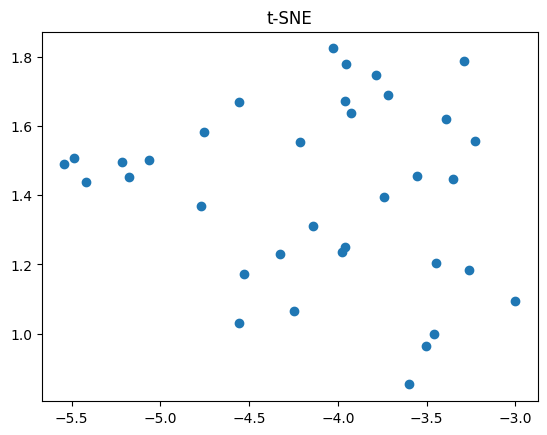

In [28]:
# Entrenar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualización
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title("t-SNE")
plt.show()

## 9. UMAP
- Técnica de reducción de dimensionalidad similar a t-SNE pero más rápida y escalable.

C:\Users\ricar\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Program Files\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


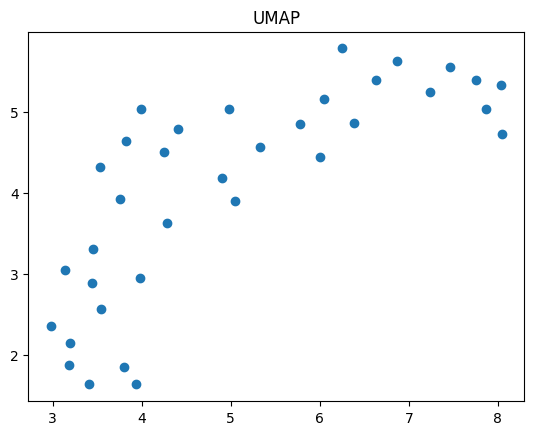

In [29]:
# Entrenar UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Visualización
plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.title("UMAP")
plt.show()

## 10. Non-Negative Matrix Factorization (NMF)
- Descompone una matriz en factores no negativos para extraer patrones interpretables.

Error de reconstrucción: 1.636712291985385e-07


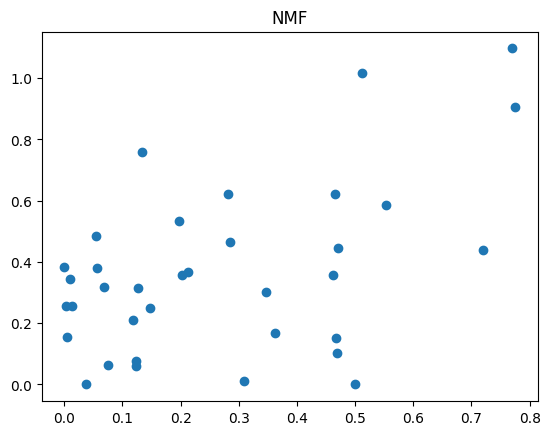

In [35]:
# Los valores deben estar entre 0-1
X_scaled = np.abs(X_scaled)

# Entrenar NMF
nmf = NMF(n_components=2, random_state=42)
W = nmf.fit_transform(X_scaled)

# Evaluación: Reconstrucción de los datos
H = nmf.components_
print(f"Error de reconstrucción: {((X_scaled - W @ H) ** 2).mean()}")

# Visualización
plt.scatter(W[:, 0], W[:, 1])
plt.title("NMF")
plt.show()